Author: Nicolas Legrand <nicolas.legrand@cfin.au.dk>

In [1]:
import pandas as pd
from cardioception.plotting import hrd_convergence, plot_confidence

no display found. Using non-interactive Agg backend


**Import data**

In [2]:
results_df = pd.read_csv('HeartRateDiscrimination.txt')

# Plot convergence

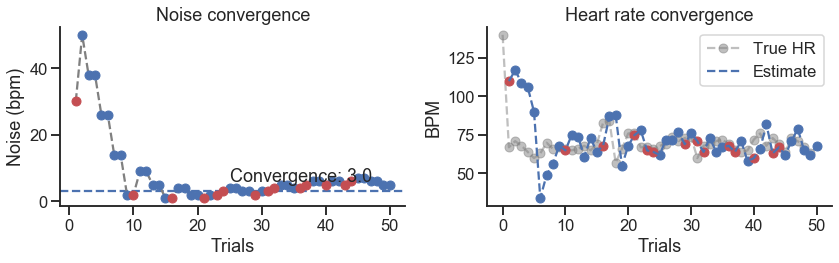

In [4]:
hrd_convergence(results_df);

# Confidence rating

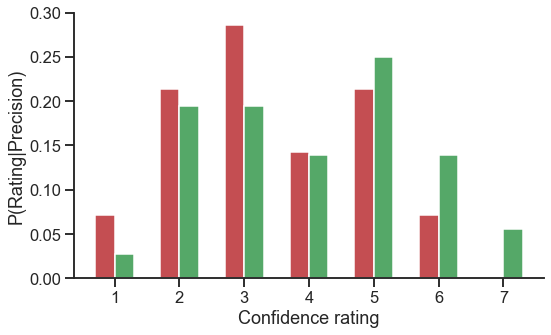

In [7]:
plot_confidence(results_df.Confidence, results_df.Accuracy);

# Psychometric function using the BayesFit toolbox

References: http://www.slugocm.ca/bayesfit/

Text(0, 0.5, 'Proportion correct')

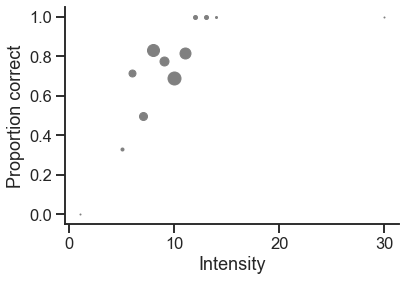

In [7]:
df = results_df.copy()
df.Alpha = np.abs(df.Alpha)
data = np.zeros((len(df.Alpha.unique()), 3))
for ii, intensity in enumerate(np.sort(df.Alpha.unique())):
    p = df[df.Alpha == intensity].Accuracy.mean()
    s= len(df[df.Alpha == intensity])
    plt.plot(intensity, p, marker='o', color='gray', markersize=s)
    
    # Store results
    data[ii, 0] = int(intensity)
    data[ii, 1] = int(len(df[(df.Alpha == intensity) & (df.Accuracy == 1)]))
    data[ii, 2] = int(len(df[(df.Alpha == intensity)]))

sns.despine()
plt.xlabel('Intensity')
plt.ylabel('Proportion correct')

In [15]:
import bayesfit as bf

In [27]:
# Define cumulative normal function to use as sigmoidal function
sigmoid_type = 'norm'

# List of logical arguments which correspond to: scale, slope, gamma, lambda
param_free = [True, True, False, False]

# Define priors for scale and slope parameters (here mu, and sigma)
priors = ['Norm(10,2)', 'Norm(20,2)', None, None]

# Fit model
metrics, options = bf.fitmodel(data, param_free = param_free, priors = priors, sigmoid_type = sigmoid_type)

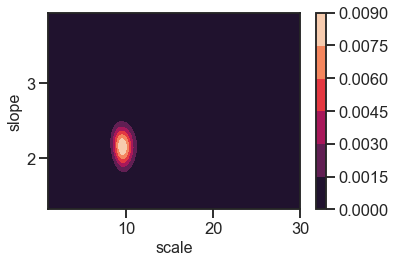

In [28]:
bf.plot_posterior(metrics)

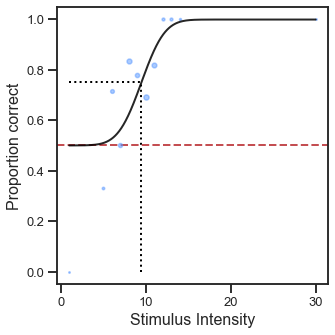

In [29]:
bf.plot_psyfcn(data, options, metrics)
plt.savefig('psychometric.png', dpi=600)